# Cognifyz  INTERNSHIP  PROGRAM (Data Science)

# Level - 2

## Task - 1 : Table Booking and Online Delivery

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline


In [4]:
df = pd.read_csv("Dataset.csv")

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

###  Determine the percentage of restaurants that offer table booking and online delivery.

In [9]:
df["Has Table booking"].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [10]:
df["Has Online delivery"].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [12]:
print("Table Booking : ", round((1158/(8393+1158))*100, 2), "%")
print("Online Delivery : ", round((2451/(7100+2451))*100, 2), "%")


Table Booking :  12.12 %
Online Delivery :  25.66 %


In [13]:
table_booking = df["Has Table booking"].value_counts().get("Yes")
online_delivery = df["Has Online delivery"].value_counts().get("Yes")

percentage_table_booking = (table_booking / len(df))*100
percentage_online_booking = (table_booking / len(df))*100

print(f"Percentage of Restaurants offrs table booking : {percentage_table_booking: .2f} %\n")
print(f"Percentage of Restaurants offrs online booking : {percentage_online_booking: .2f} %\n")


Percentage of Restaurants offrs table booking :  12.12 %

Percentage of Restaurants offrs online booking :  12.12 %



### Compare the average ratings of restaurants with table booking and those without

In [14]:
df_with_table_booking = df[df["Has Table booking"] == "Yes"]
df_without_table_booking = df[df["Has Table booking"] == "No"]

print("Rows With Table : ", df_with_table_booking.shape)
print("Rows Without Table : ", df_without_table_booking.shape)

Rows With Table :  (1158, 21)
Rows Without Table :  (8393, 21)


In [15]:
print("Average Ratings : ")
print("With Table Booking : ", round(df_with_table_booking["Aggregate rating"].mean(), 2))
print("Without Table Booking : ", round(df_with_table_booking["Aggregate rating"].mean(), 2))


Average Ratings : 
With Table Booking :  3.44
Without Table Booking :  3.44


###  Analyze the availability of online delivery among restaurants with different price ranges.

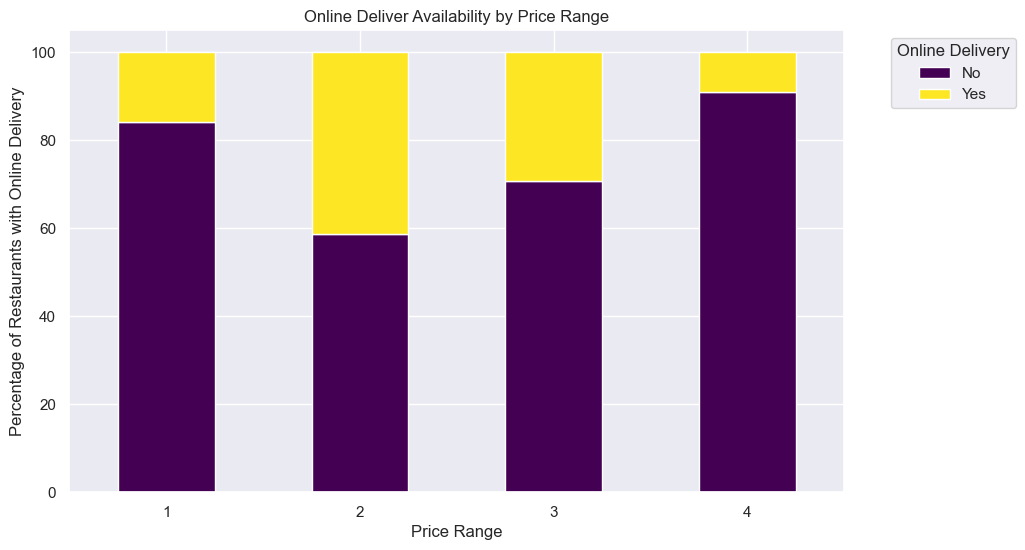

In [18]:
Online_delivery_by_price_range = df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True).unstack()*100
Online_delivery_by_price_range.plot(kind ="bar", stacked=True,colormap="viridis",figsize=(10,6))

plt.title("Online Deliver Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants with Online Delivery")

plt.xticks(rotation = 0)
plt.legend(title = "Online Delivery", bbox_to_anchor=(1.05, 1))
plt.show()

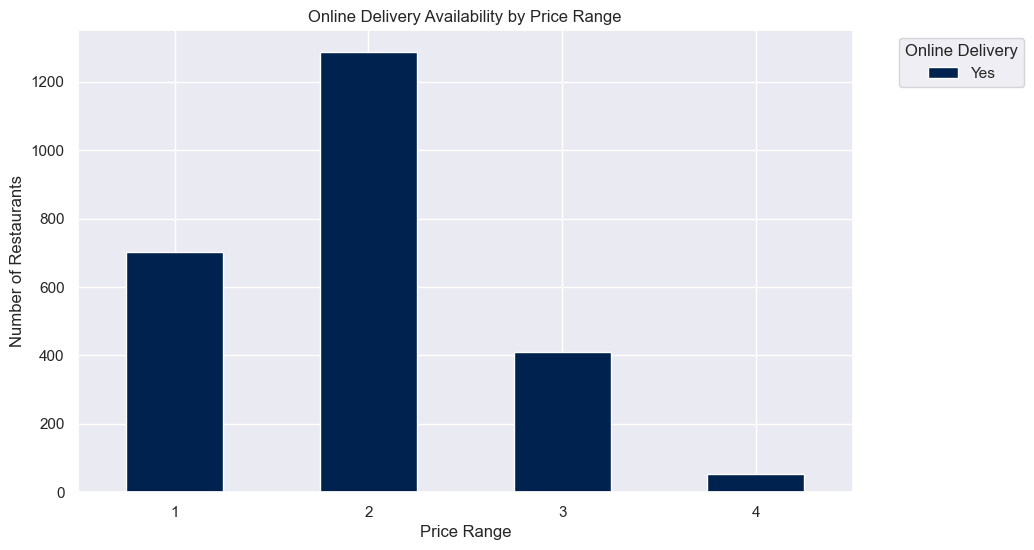

In [21]:

Online_Delivery_Yes = df[df["Has Online delivery"] == "Yes"]


Online_Delivery_counts = Online_Delivery_Yes.groupby(["Price range", "Has Online delivery"]).size().unstack()


Online_Delivery_counts.plot(kind="bar", colormap="cividis", figsize=(10, 6))


plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")


plt.xticks(rotation=0)


plt.legend(title="Online Delivery", bbox_to_anchor=(1.05, 1), loc="upper left")


plt.show()
